# Advanced Regression Assignment

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:
- Which variables are significant in predicting the price of a house, and <br>
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Objective
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. <br>
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Dictionary

# Step 1: Understanding the dataset

### Importing libraries

In [918]:
# Import the required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [919]:
# As the dataset is big, jupyternotebook tends to display a shorter version with less columns/rows.
# This is hindering the ability to see the data at a glance. 

# Hence Lets display max rows available in a dataframe
pd.set_option('display.max_rows', None)

# Display max columns available in a dataframe
pd.set_option('display.max_column', None)

# Display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# Display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

# Expand the output display to see more columns
pd.set_option('expand_frame_repr', True)

## Understanding the data

#### As per the data dictionary and problem statement, we need to model the value of prospective properties. Hence the target variable is `SalePrice`
Let us load the dataset and look at the dataset closely

In [920]:
housing = pd.read_csv("./train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [921]:
housing.shape

(1460, 81)

In [922]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [923]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Looks like there are multiple null values in the dataset

# Data Preparation

`Id` is just an index, let us drop it as we can use internal dataframe index.

In [924]:
# Drop `Id` column
housing.drop("Id", axis= 1, inplace=True)

## Multicollinearity

Let us find correlated variables

In [925]:
def PlotCorrelation(corr):
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr, annot=True, cmap="YlGnBu")
    plt.show()

corr = housing.corr()
PlotCorrelation(corr)

KeyboardInterrupt: 

Here we can see that there is multicollinearity between variables
1. `YearBuilt` and `GarageYrBlt`
2. `YearRemodAdd` and `GarageYrBlt`
3. `BsmtFinSF1` and `BsmtFullBath`
4. `TotalBsmtSF` and `1stFlrSF`
5. `GrLivArea` and `2ndFlrSF`
6. `GrLivArea` and `FullBath`
7. `GrLivArea` and `TotRmsAbvGrd`
8. `GarageCars` and `GarageArea`

Let us drop following columns
- `GarageYrBlt`
- `BsmtFullBath`
- `1stFlrSF` 
- `GarageCars`
- `2ndFlrSF`, `FullBath`, `TotRmsAbvGrd` -> as `GrLivArea` describes them

In [ ]:
columnsToDrop = ["GarageYrBlt", "BsmtFullBath", "1stFlrSF", "GarageCars", "2ndFlrSF", "FullBath", "TotRmsAbvGrd"]
housing.drop(columns=columnsToDrop, axis=1, inplace=True)

Let us check the correlation again.

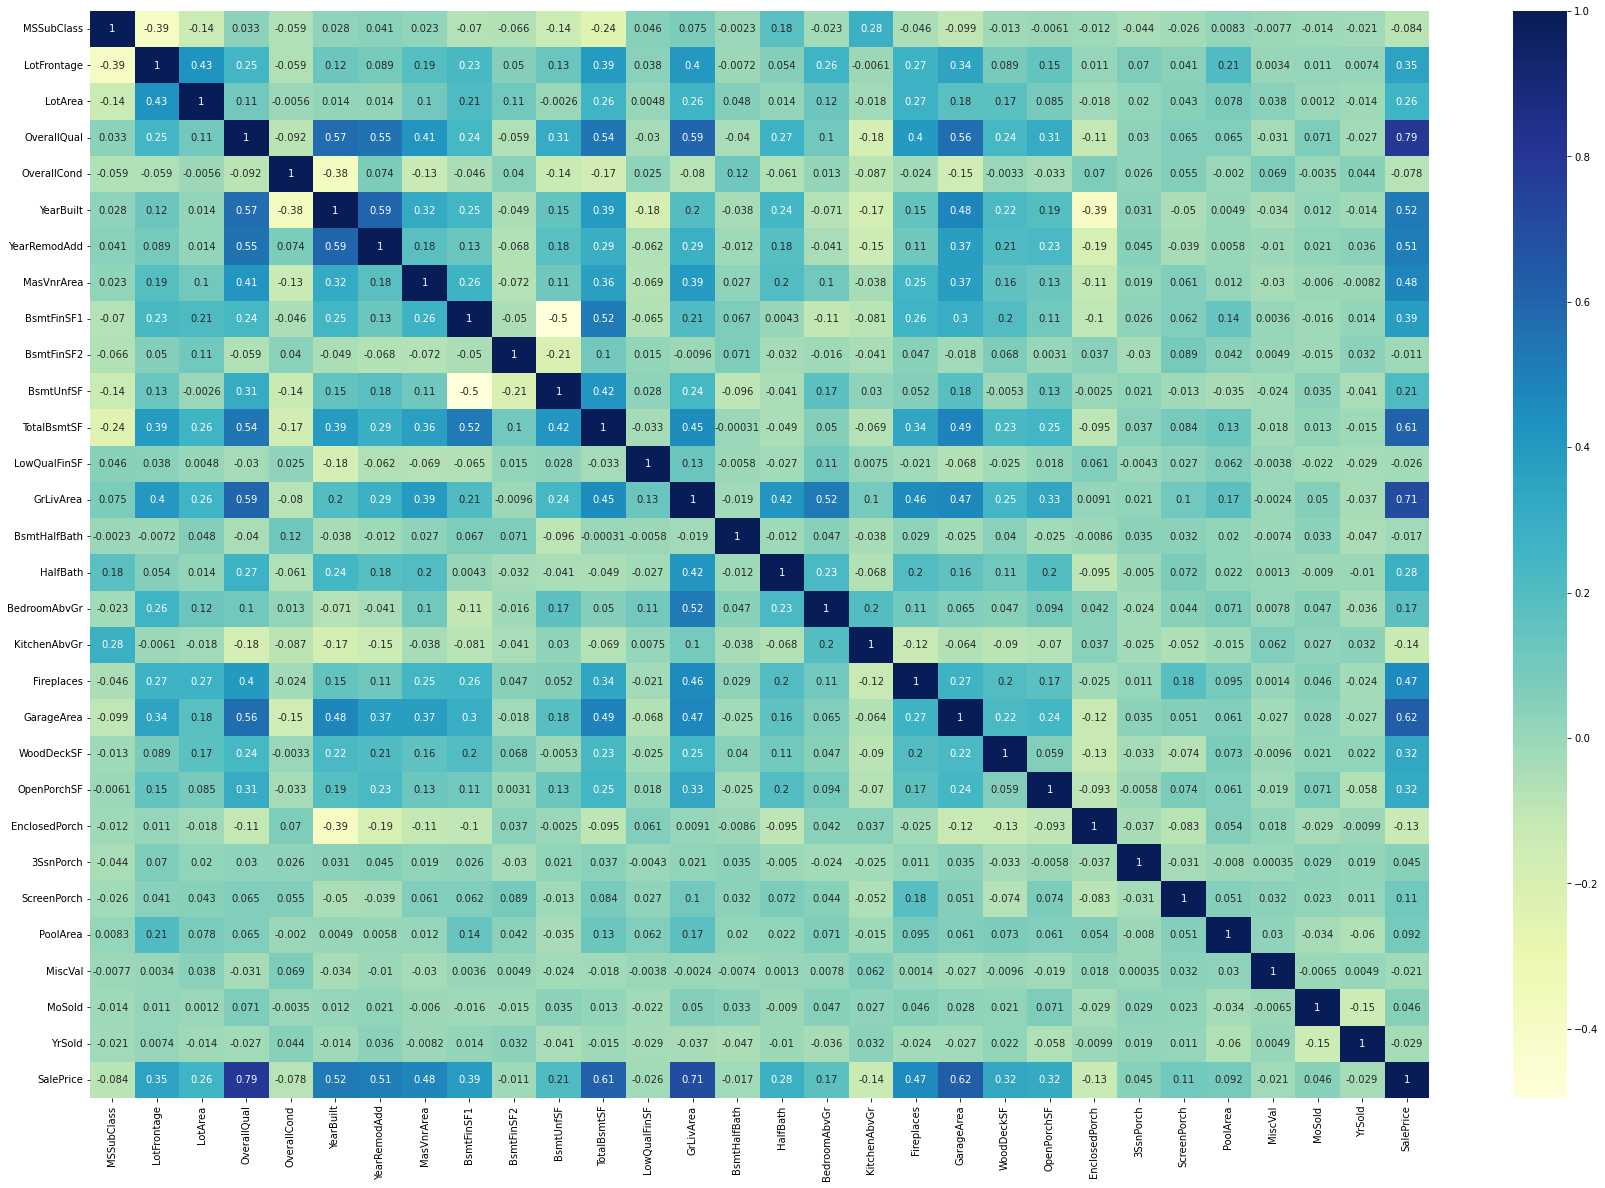

In [ ]:
corr = housing.corr()
PlotCorrelation(corr)

## Handling null values

Let us take a look at the number of null values in the dataset

In [ ]:
# Print % of null values in the dataset
(housing.isnull().sum()/len(housing))*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

There are a lot of null values in the dataset. Let us remove the columns with more than 45% null values.

In [ ]:
((housing.isnull().sum()/len(housing))*100)[((housing.isnull().sum()/len(housing))*100).values > 45]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

Let us drop these columns as they have a high number of null values.
- `Alley`
- `FireplaceQu`
- `PoolQC`
- `Fence`
- `MiscFeature`

In [ ]:
housing.drop(columns= ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)
housing.shape

(1460, 68)

After removing null columns, we are left with 68 columns.

## Missing value imputation

Let us check the columns that have missing/null values 

In [ ]:
print(((housing.isnull().sum()/len(housing))*100)[((housing.isnull().sum()/len(housing))*100).values > 0])

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


Let us impute them on case by case basis.

`LotFrontage` is Linear feet of street connected to property (refering data dictionary)<br>
Let us assume the small percentage of missing values will have median values for `LotFrontage`. This assumption will not skew the results due to imputation.

In [ ]:
housing.LotFrontage.fillna(housing.LotFrontage.median(), inplace=True)

`MasVnrType` and `MasVnrArea` <br>
We can see that the percentage of missing values (0.547945) is same for both the columns. This means that the columns that have missing values for MasVnrType must be the same for which MasVnrArea is also missing. <br>

**Theory:** <br>
Set A = $ Set \: of \: missing \: values \: of \: MasVnrType $ <br>
Set B = $ Set \: of \: missing \: values \: MasVnrType \: \bigcap \: Set \: of \: missing \: values \: of \: MasVnrArea $

Assumption is that Set A = Set B (Equal sets)<br>
Let us test this theory.

In [ ]:
def AreNullValuesForTwoColumnsAnEqualSet(column1, column2):
    nullRowCountForColumn1 = (housing[column1][housing[column1].isnull()]).isnull().sum()
    nullRowCountForIntersectionOfColumn1AndColumn2 = (housing[column2][housing[column1].isnull()]).isnull().sum()
    print("\nNull row count for", column1, ": ", nullRowCountForColumn1, "\nNull row count for intersection of ", column1, " and ", column2, ": ", nullRowCountForIntersectionOfColumn1AndColumn2, "\n")
    return nullRowCountForColumn1 == nullRowCountForIntersectionOfColumn1AndColumn2

isEqualSet = AreNullValuesForTwoColumnsAnEqualSet("MasVnrType", "MasVnrArea")

if(isEqualSet):
    print("Our assumption is true.")
else:
    print("Our assumption is not true")


Null row count for MasVnrType :  8 
Null row count for intersection of  MasVnrType  and  MasVnrArea :  8 

Our assumption is true.


We can see that our theory is correct. 

`MasVnrType` is the Masonry veneer type
It can take following values:
- BrkCmn	(Brick Common)
- BrkFace	(Brick Face)
- CBlock	(Cinder Block)
- None  	(None)
- Stone	    (Stone)

`MasVnrArea` is Masonry veneer area in square feet
 
As this values was not mentioned by a human in some rows, there is a high probability that there is no masonry veener wall for the housing property.<br>

Hence, let us impute missing value of MasVnrType with "None". As the Masonry veener wall is missing, the area in sqft (MasVnrArea) will be 0.

In [ ]:
housing.MasVnrType.fillna("None", inplace=True)
housing.MasVnrArea.fillna(0, inplace=True)

`BsmtQual`, `BsmtCond`,  <br>
`BsmtQual` is evaluation of the height of the basement <br>
and `BsmtCond` is evaluation the general condition of the basement <br>

For values missing for a row in the database, there must be no basement for the property.<br>
Let us test our theory and impute them with None.

In [ ]:
isEqualSet = AreNullValuesForTwoColumnsAnEqualSet("BsmtQual", "BsmtCond")

if(isEqualSet):
    print("Our assumption is true.")
    housing.BsmtQual.fillna("None", inplace=True)
    housing.BsmtCond.fillna("None", inplace=True)
else:
    print("Our assumption is not true")


Null row count for BsmtQual :  37 
Null row count for intersection of  BsmtQual  and  BsmtCond :  37 

Our assumption is true.


Similarly we can approach `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` <br>
Let us replace them with None 

In [ ]:
isEqualSet = (AreNullValuesForTwoColumnsAnEqualSet("GarageType", "GarageFinish") 
                == AreNullValuesForTwoColumnsAnEqualSet("GarageFinish", "GarageQual")
                == AreNullValuesForTwoColumnsAnEqualSet("GarageQual", "GarageCond"))

if(isEqualSet):
    print("Our assumption is true.")
    housing.GarageType.fillna("None", inplace=True)
    housing.GarageFinish.fillna("None", inplace=True)
    housing.GarageQual.fillna("None", inplace=True)
    housing.GarageCond.fillna("None", inplace=True)
else:
    print("Our assumption is not true")


Null row count for GarageType :  81 
Null row count for intersection of  GarageType  and  GarageFinish :  81 


Null row count for GarageFinish :  81 
Null row count for intersection of  GarageFinish  and  GarageQual :  81 


Null row count for GarageQual :  81 
Null row count for intersection of  GarageQual  and  GarageCond :  81 

Our assumption is true.


Similarly we can approach `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`<br>
Impute null values with None

In [ ]:
isEqualSet = (AreNullValuesForTwoColumnsAnEqualSet("BsmtFinType1", "BsmtExposure") 
                == AreNullValuesForTwoColumnsAnEqualSet("BsmtFinType1", "BsmtFinType2"))

if(isEqualSet):
    print("Our assumption is true.")
    housing.loc[housing.BsmtFinType1.isnull(), "BsmtExposure"] = housing.loc[housing.BsmtFinType1.isnull(), "BsmtExposure"].fillna("None")
    housing.loc[housing.BsmtFinType1.isnull(), "BsmtFinType2"] = housing.loc[housing.BsmtFinType1.isnull(), "BsmtFinType2"].fillna("None")
    # (housing.BsmtExposure[housing.BsmtFinType1.isnull()]).fillna("None", inplace=True)
    # (housing.BsmtFinType2[housing.BsmtFinType1.isnull()]).fillna("None", inplace=True)
    housing.BsmtFinType1.fillna("None", inplace=True)
    
else:
    print("Our assumption is not true")


Null row count for BsmtFinType1 :  37 
Null row count for intersection of  BsmtFinType1  and  BsmtExposure :  37 


Null row count for BsmtFinType1 :  37 
Null row count for intersection of  BsmtFinType1  and  BsmtFinType2 :  37 

Our assumption is true.


`Electrical`<br>
`Electrical` is Electrical system used in the house
This is a categorical column and takes following values:
- SBrkr	(Standard Circuit Breakers & Romex)
- FuseA	(Fuse Box over 60 AMP and all Romex wiring (Average))
- FuseF	(60 AMP Fuse Box and mostly Romex wiring (Fair))
- FuseP	(60 AMP Fuse Box and mostly knob & tube wiring (poor))
- Mix	(Mixed)

Missing values for this column can be filled with mode value of `Electrical`

In [ ]:
housing.Electrical.fillna(housing.Electrical.mode().values[0], inplace=True)

Let us again check for null values in the dataset.

In [ ]:
print(((housing.isnull().sum()/len(housing))*100)[((housing.isnull().sum()/len(housing))*100).values > 0])

BsmtExposure    0.068493
BsmtFinType2    0.068493
dtype: float64


In [ ]:
print("No of Null values for BsmtExposure: ", housing.BsmtExposure.isnull().sum())
print("No of Null values for BsmtFinType2: ", housing.BsmtFinType2.isnull().sum())

No of Null values for BsmtExposure:  1
No of Null values for BsmtFinType2:  1


There is only one null value for the columns, let us drop these rows.

In [ ]:
housing.dropna(inplace=True)

In [ ]:
print(((housing.isnull().sum()/len(housing))*100)[((housing.isnull().sum()/len(housing))*100).values > 0])

Series([], dtype: float64)


We can see that there are no null values present in the dataset

In [ ]:
housing.shape

(1458, 68)

## Categorical and Continous

Let us divide `housing` data into two subsets `continous` and `categorical` data for representation

In [ ]:
continuosColumns = housing.select_dtypes(include=["int64", "float64"])
continuosColumns.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,0,1710,0,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,1262,1,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,0,1786,0,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,0,1717,0,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,0,2198,0,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
categoricalColumns = housing.select_dtypes(exclude=["int64", "float64"])
categoricalColumns.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## Biased data cleaning

Let us find if the data that we have is biased towards a value for categorical columns  

In [ ]:
housing.shape

(1458, 68)

In [ ]:
for column in categoricalColumns:
    print(column,":\n",housing[column].value_counts(normalize=True), "\n")

MSZoning :
 RL         0.788066
RM         0.149520
FV         0.044582
RH         0.010974
C (all)    0.006859
Name: MSZoning, dtype: float64 

Street :
 Pave    0.995885
Grvl    0.004115
Name: Street, dtype: float64 

LotShape :
 Reg    0.634431
IR1    0.330590
IR2    0.028121
IR3    0.006859
Name: LotShape, dtype: float64 

LandContour :
 Lvl    0.897805
Bnk    0.043210
HLS    0.034294
Low    0.024691
Name: LandContour, dtype: float64 

Utilities :
 AllPub    0.999314
NoSeWa    0.000686
Name: Utilities, dtype: float64 

LotConfig :
 Inside     0.720165
Corner     0.180384
CulDSac    0.064472
FR2        0.032236
FR3        0.002743
Name: LotConfig, dtype: float64 

LandSlope :
 Gtl    0.946502
Mod    0.044582
Sev    0.008916
Name: LandSlope, dtype: float64 

Neighborhood :
 NAmes      0.154321
CollgCr    0.102195
OldTown    0.077503
Edwards    0.068587
Somerst    0.058985
Gilbert    0.054184
NridgHt    0.052126
Sawyer     0.050754
NWAmes     0.050069
SawyerW    0.040466
BrkSide    0.

We can see that `Street`, `LandContour`, `LandSlope`, `Condition1`, `Condition2`, `RoofStyle`, `RoofMatl`, `ExterCond`, `BsmtCond`, `BsmtFinType2`, `Heating`, `CentralAir`, `Electrical`, `Functional`, `GarageQual`, `GarageCond`, `PavedDrive`, `SaleType`, `SaleCondition` have bias more than 85% for a value. <br>
Let us drop these columns.

In [ ]:
housing.drop(columns=["Street", "LandContour", "LandSlope", "Condition1", "Condition2", "RoofStyle", "RoofMatl", "ExterCond", "BsmtCond", "BsmtFinType2", "Heating", "CentralAir", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition"], axis=1, inplace=True)

In [ ]:
housing.shape

(1458, 49)

In [ ]:
# As we have deleted some columns, let us rebuild the columns categories
continuosColumns = housing.select_dtypes(include=["int64", "float64"])
categoricalColumns = housing.select_dtypes(exclude=["int64", "float64"])

In [ ]:
# Plotting continous values

# plt.figure(figsize=(20, 170))
# columns = continuosColumns.columns.tolist()
# for i in range(1, len(columns)+1):
#     plt.subplot(len(columns),2,i)
#     sns.scatterplot(x=columns[i-1], y="SalePrice", data=continuosColumns)
#     i=i+1

# plt.show()

In [ ]:
# Plotting categorical values
# plt.figure(figsize=(20, 200))
# columns = categoricalColumns.columns.tolist()
# for i in range(1, len(columns)+1):
#     plt.subplot(len(columns),1,i)
#     sns.boxplot(x=columns[i-1], y="SalePrice", data=housing)
#     i=i+1

# plt.show()

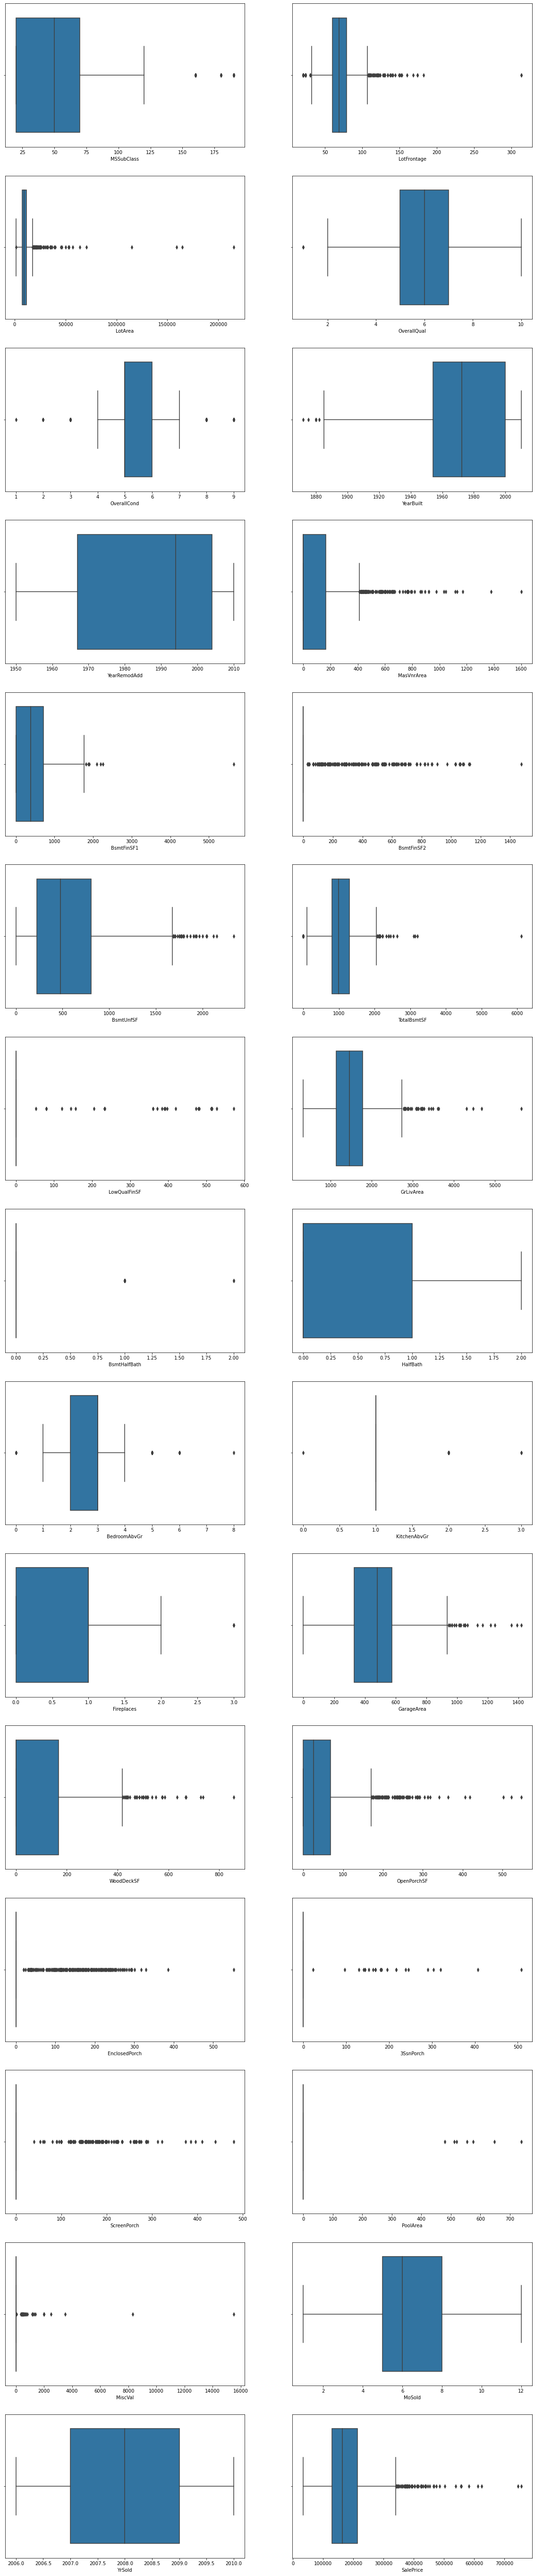

In [ ]:
# Box plot for continous columns

plt.figure(figsize=(20, 200))
columns = continuosColumns.columns.tolist()
for i in range(1, len(columns)+1):
    plt.subplot(len(columns),2,i)
    sns.boxplot(x=columns[i-1], data=housing)
    i=i+1

plt.show()

In [ ]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.920439,69.856653,10514.340192,6.097394,5.576132,1971.224966,1984.840878,102.956790,443.477366,46.284636,566.277092,1056.039095,5.852538,1515.207133,0.057613,0.382716,2.866255,1.046639,0.612483,472.700274,94.275034,46.658436,21.984225,3.414266,15.081619,2.762689,43.548697,6.322359,2007.816187,180842.555556
std,42.318471,22.038854,9987.693883,1.382847,1.113359,30.201431,20.648596,180.781523,455.914697,161.027072,441.229931,435.368923,48.655960,525.788142,0.238907,0.502871,0.816323,0.220483,0.644949,213.685463,125.393707,66.277613,61.155666,29.337173,55.792877,40.204743,496.460799,2.701393,1.327792,79450.510832
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,0.000000,1128.500000,0.000000,0.000000,2.000000,1.000000,0.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,383.500000,0.000000,475.000000,991.500000,0.000000,1461.500000,0.000000,0.000000,3.000000,1.000000,1.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,712.000000,0.000000,807.500000,1297.750000,0.000000,1778.250000,0.000000,1.000000,3.000000,1.000000,1.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,572.000000,5642.000000,2.000000,2.000000,8.000000,3.000000,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
housing.shape

(1458, 49)

## Outlier treatment

From the Box plot and the dataframe description above, we can see that there are outliers present in the data let us remove them

In [ ]:
def RemoveOutliers():
    global housing
    for col in continuosColumns:
        q1 = housing[col].quantile(.25)
        q3 = housing[col].quantile(.90)
        IQR = q3 - q1
        housing= housing[(housing[col]>= (q1-(1.5*IQR)))& (housing[col]<= (q3+(1.5*IQR)))]

RemoveOutliers()

In [ ]:
housing.shape

(996, 49)

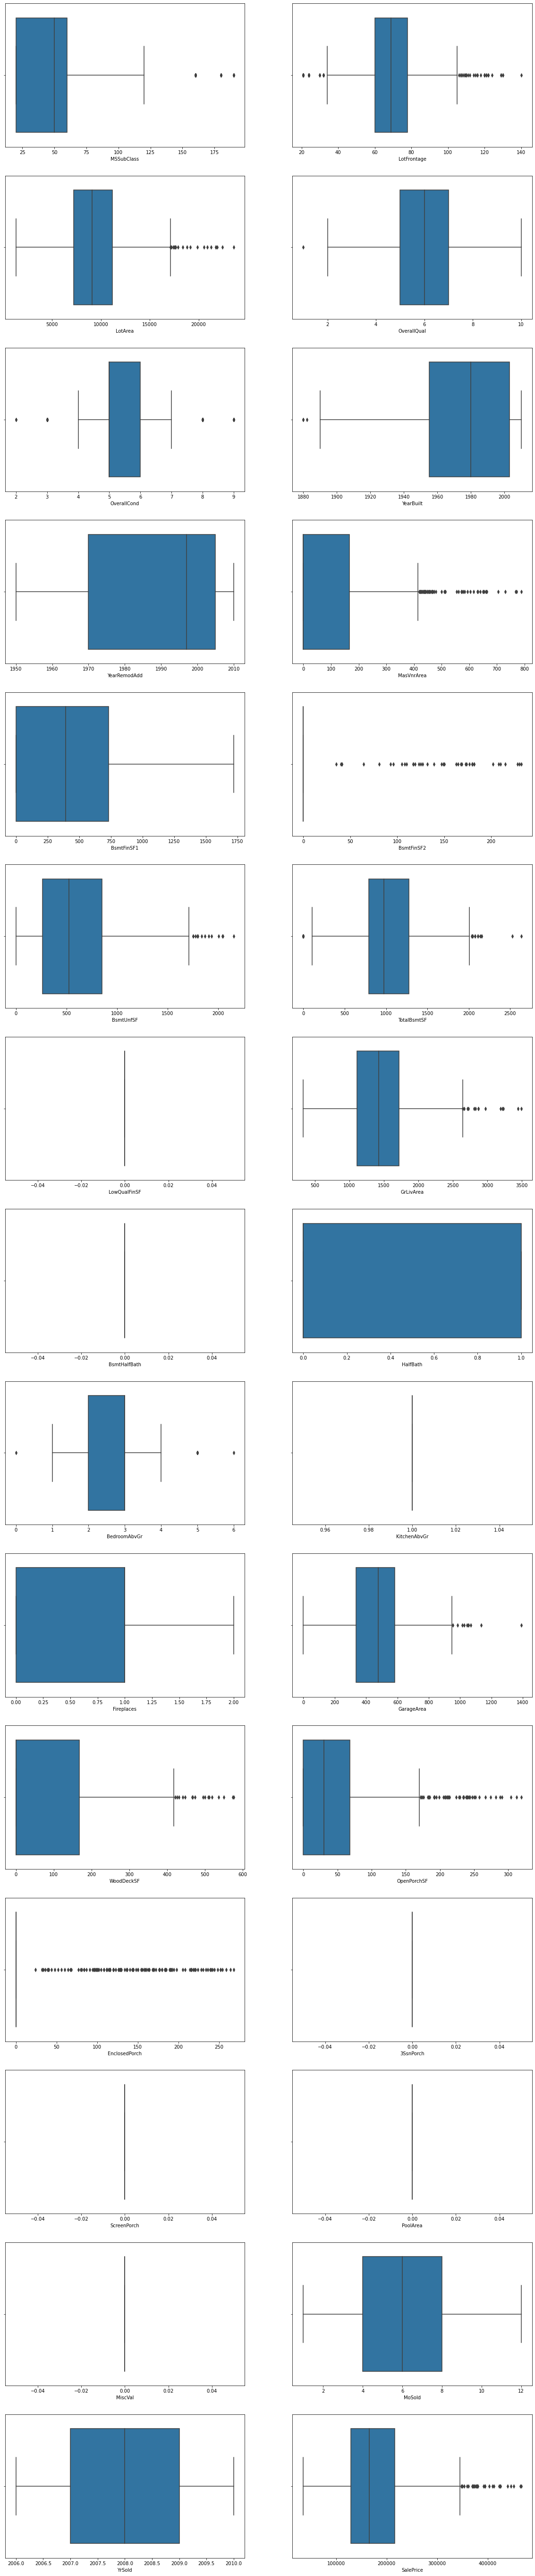

In [ ]:
# Box plot for continous columns
plt.figure(figsize=(20, 200))
columns = continuosColumns.columns.tolist()
for i in range(1, len(columns)+1):
    plt.subplot(len(columns),2,i)
    sns.boxplot(x=columns[i-1], data=housing)
    i=i+1

plt.show()

## ENCODING AND RESCALING DATA

In [ ]:
target = housing.pop('SalePrice')
predictors = housing

In [ ]:
categoricalColumns =  predictors.select_dtypes(include=['object']).columns
predictors = pd.get_dummies(data=predictors, columns=categoricalColumns, drop_first = True)
predictors.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,0,1710,0,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,0,1786,0,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,0,2198,0,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,0,1694,0,0,3,1,1,636,255,57,0,0,0,0,0,8,2007,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,0,1040,0,0,3,1,0,384,0,0,0,0,0,0,0,2,2008,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
predictors.shape

(996, 140)

# Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.7, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(697, 140)
(299, 140)


## Rescaling the features

### Min-Max scaler

In [ ]:
# Instantiate a MinMaxScalar object
scaler = MinMaxScaler()

In [ ]:
# Fit the data on scale
continuosColumns =  predictors.columns
X_train[continuosColumns] = scaler.fit_transform(X_train[continuosColumns])
X_test[continuosColumns] = scaler.transform(X_test[continuosColumns])

In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
325,0.147059,0.243697,0.165956,0.444444,0.500000,0.472868,0.000000,0.00000,0.070474,0.0,0.280539,0.273452,0.0,0.148465,0.0,0.0,0.4,0.0,0.0,0.258993,0.000000,0.000000,0.924242,0.0,0.0,0.0,0.0,1.000000,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
525,0.000000,0.344538,0.278089,0.666667,0.333333,0.968992,0.916667,0.00000,0.000000,0.0,0.583837,0.477402,0.0,0.295030,0.0,0.0,0.6,0.0,0.5,0.325899,0.065972,0.451411,0.000000,0.0,0.0,0.0,0.0,0.272727,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
787,0.235294,0.462185,0.396591,0.666667,0.333333,0.961240,0.900000,0.00000,0.398542,0.0,0.139340,0.363084,0.0,0.553973,0.0,1.0,0.8,0.0,0.0,0.444604,0.000000,0.141066,0.000000,0.0,0.0,0.0,0.0,0.000000,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
X_train.shape

(697, 140)

Let us check correlation between all the columns again.

# Training the model

In [ ]:
# Using LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluations on the test and train dataset

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [ ]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.940342083722887
-1196322705353340.8
209322178749.79276
1.9778642229151804e+27
300318764.34690493
6.614930511422009e+24


In [ ]:
# Build Model
def BuildModel(x, y):
    # Adding a constant variable 
    x = sm.add_constant(x)

    # Running the linear model
    lm = sm.OLS(y, x).fit()   

    #Let's see the summary of our linear model
    print(lm.summary())
    print(lm.params)
    return x

# Calculate the VIFs for the new model
def GetVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns # Name all the columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]    # Calculate VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2)   # Rounding off values to 2 decimals
    vif = vif.sort_values(by = "VIF", ascending = False)    # Sorting the features by decreasing VIF values
    return vif

# Ridge

In [ ]:
# Run RFE using 15 significant variables

lmrfe = LinearRegression()
rfe = RFE(estimator=lmrfe, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Identify the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'ExterQual_Gd', 'ExterQual_TA'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[cols]

In [ ]:
X_test_rfe = X_test[cols]

In [ ]:
x_train_new = BuildModel(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     413.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:59:50   Log-Likelihood:                -7968.3
No. Observations:                 697   AIC:                         1.597e+04
Df Residuals:                     681   BIC:                         1.604e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.992e+04 

In [ ]:
# Let us also check Variance Inflation factor for the model
GetVIF(x_train_new)

,Features,VIF
6,BsmtUnfSF,233.28
5,BsmtFinSF1,211.65
7,TotalBsmtSF,175.95
0,const,102.97
13,Exterior2nd_CmentBd,31.71
12,Exterior1st_CemntBd,31.25
15,ExterQual_TA,10.44
14,ExterQual_Gd,9.00
2,OverallQual,3.38
4,YearBuilt,2.65


In [ ]:
x_train_new.drop(['BsmtUnfSF'],axis = 1, inplace = True)

In [ ]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     439.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:59:50   Log-Likelihood:                -7971.0
No. Observations:                 697   AIC:                         1.597e+04
Df Residuals:                     682   BIC:                         1.604e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.023e+04 

In [ ]:
GetVIF(x_train_new)

,Features,VIF
0,const,102.94
12,Exterior2nd_CmentBd,31.71
11,Exterior1st_CemntBd,31.25
14,ExterQual_TA,10.44
13,ExterQual_Gd,9.00
2,OverallQual,3.38
4,YearBuilt,2.65
7,GrLivArea,2.08
6,TotalBsmtSF,1.98
8,GarageArea,1.95


In [ ]:
x_train_new.drop(['Exterior2nd_CmentBd'],axis = 1, inplace = True)

In [ ]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     469.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:59:51   Log-Likelihood:                -7974.3
No. Observations:                 697   AIC:                         1.598e+04
Df Residuals:                     683   BIC:                         1.604e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.851e+04 

In [ ]:
GetVIF(x_train_new)

,Features,VIF
0,const,102.32
13,ExterQual_TA,10.08
12,ExterQual_Gd,8.59
2,OverallQual,3.38
4,YearBuilt,2.64
7,GrLivArea,2.08
6,TotalBsmtSF,1.96
8,GarageArea,1.95
1,LotArea,1.42
3,OverallCond,1.39


In [ ]:
x_train_new.drop(['ExterQual_TA'],axis = 1, inplace = True)

In [ ]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     450.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.11e-315
Time:                        22:59:52   Log-Likelihood:                -8012.4
No. Observations:                 697   AIC:                         1.605e+04
Df Residuals:                     684   BIC:                         1.611e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.668e+04 

In [ ]:
GetVIF(x_train_new)

,Features,VIF
0,const,44.53
2,OverallQual,3.16
4,YearBuilt,2.64
7,GrLivArea,2.07
6,TotalBsmtSF,1.95
8,GarageArea,1.95
12,ExterQual_Gd,1.81
1,LotArea,1.42
3,OverallCond,1.38
5,BsmtFinSF1,1.27


In [ ]:
x_train_new.drop(['ExterQual_Gd'],axis = 1, inplace = True)

In [ ]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     492.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.95e-316
Time:                        22:59:52   Log-Likelihood:                -8012.4
No. Observations:                 697   AIC:                         1.605e+04
Df Residuals:                     685   BIC:                         1.610e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.588e+04 

In [ ]:
GetVIF(x_train_new)

,Features,VIF
0,const,39.51
2,OverallQual,3.05
4,YearBuilt,2.31
7,GrLivArea,2.06
6,TotalBsmtSF,1.95
8,GarageArea,1.95
1,LotArea,1.41
3,OverallCond,1.38
5,BsmtFinSF1,1.24
9,Neighborhood_NridgHt,1.23


In [ ]:
x_train_new.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_NridgHt,Neighborhood_StoneBr,Exterior1st_CemntBd
325,1.0,0.165956,0.444444,0.500000,0.472868,0.070474,0.273452,0.148465,0.258993,0.0,0.0,0.0
525,1.0,0.278089,0.666667,0.333333,0.968992,0.000000,0.477402,0.295030,0.325899,0.0,0.0,0.0
787,1.0,0.396591,0.666667,0.333333,0.961240,0.398542,0.363084,0.553973,0.444604,0.0,0.0,0.0
163,1.0,0.188383,0.333333,0.500000,0.589147,0.000000,0.334979,0.173473,0.000000,0.0,0.0,0.0
582,1.0,0.472797,0.555556,0.333333,0.852713,0.495747,0.309913,0.152580,0.000000,0.0,0.0,0.0


In [ ]:
x_train_new.drop(columns=["const"], inplace=True, axis=1)

## Ridge

In [ ]:
# List of alphas to be used for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_model = Ridge()

# we will use 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge_model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
                                    
model_cv.fit(x_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
x_train_new.shape

(697, 11)

In [ ]:
print(model_cv.best_params_)

{'alpha': 1.0}


In [ ]:
ridge_model = Ridge(alpha=1.0)
        
ridge_model.fit(x_train_new, y_train)
print(ridge_model.intercept_)
print(ridge_model.coef_) 

-70147.95044463297
[ 51008.13670135 121091.93452009  29142.23923311  55385.50338522
  38448.15891032  61293.28546019 153796.98124689  47367.1445586
  34881.07574926  29177.18959274   9777.97367158]


In [ ]:
cols = x_train_new.columns
X_test_rfe = X_test[cols]

# Evaluations on the test and train dataset and calculation of metrics using Ridge parameters
y_train_pred = ridge_model.predict(x_train_new)
y_test_pred = ridge_model.predict(X_test_rfe)

ridgeMetrics = []
r2_train = r2_score(y_train, y_train_pred)
print('R2 Value Train:', r2_train)
ridgeMetrics.append(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print('R2 Value Test:', r2_test)
ridgeMetrics.append(r2_test)
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS Value Train:', rss_train)
ridgeMetrics.append(rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))
print('RSS Value Test:', rss_test)
ridgeMetrics.append(rss_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE Value Train:', mse_train)
ridgeMetrics.append(mse_train ** 0.5)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE Value Test:',mse_test)
ridgeMetrics.append(mse_test ** 0.5)

R2 Value Train: 0.8870732578259304
R2 Value Test: 0.8811744112163516
RSS Value Train: 396226908113.7986
RSS Value Test: 196452746211.64575
MSE Value Train: 568474760.5649908
MSE Value Test: 657032596.0255711


### Residual Analysis of the train data
The error terms must be normally distributed

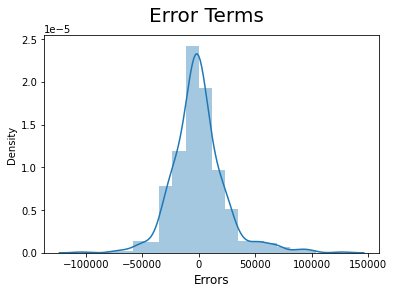

In [ ]:
fig = plt.figure() 
residual = y_train - y_train_pred
sns.distplot(residual, bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 12)
plt.show()

### Homoscedasticity
Error terms must have constant variance 

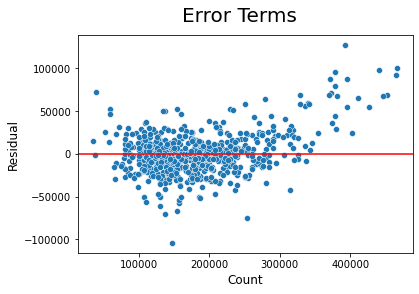

In [ ]:
plt.figure() 
residual = y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.axhline(0, color = 'r')
plt.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

### Understand the spread

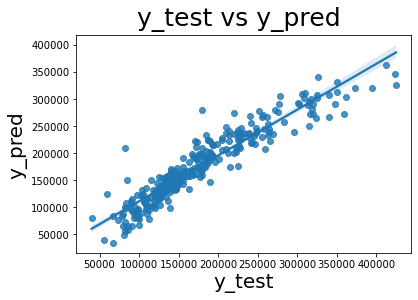

In [ ]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)             
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_pred', fontsize = 20)  
plt.show()

In [ ]:
cols = x_train_new.columns
ridge_betas = pd.DataFrame(index=cols)
ridge_betas['Ridge'] = np.round(ridge_model.coef_,2)
print(ridge_betas)

                          Ridge
LotArea                51516.26
OverallQual           117447.34
OverallCond            26769.96
YearBuilt              55437.31
BsmtFinSF1             38135.22
TotalBsmtSF            60911.30
GrLivArea             145068.00
GarageArea             49840.87
Neighborhood_NridgHt   35402.35
Neighborhood_StoneBr   27411.51
Exterior1st_CemntBd    10252.06


## Lasso

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [888]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_new, y_train) 

Lasso(alpha=100)

In [889]:
lasso.coef_

array([-2.65043655e+04,  0.00000000e+00,  2.52346245e+04,  8.13249182e+04,
        2.55579086e+04,  4.68456377e+04,  6.61913403e+03,  5.01905055e+03,
        2.68550556e+04, -0.00000000e+00,  0.00000000e+00,  4.66286088e+04,
        0.00000000e+00,  1.55872730e+05,  0.00000000e+00,  1.70095335e+03,
       -0.00000000e+00,  0.00000000e+00,  6.68560195e+03,  3.05374696e+04,
        1.85917351e+04,  7.18745092e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.16413845e+02,
       -0.00000000e+00,  7.72660690e+03,  0.00000000e+00,  0.00000000e+00,
       -3.35528802e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.05999017e+03, -3.37962431e+03, -0.00000000e+00, -4.02923533e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.50912604e+03,  2.78859927e+04, -9.57668204e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.04282463e+04, -3.47416585e+03,
        0.00000000e+00, -

In [890]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

lassoMetrics = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Value Train: ", r2_train_lr)
lassoMetrics.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Value Test: ", r2_test_lr)
lassoMetrics.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS Value Train: ", rss1_lr)
lassoMetrics.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS Value Test: ", rss2_lr)
lassoMetrics.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE Value Train: ", mse_train_lr)
lassoMetrics.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE Value Train: ", mse_test_lr)
lassoMetrics.append(mse_test_lr**0.5)

R2 Value Train:  0.93362069756736
R2 Value Test:  0.9155850954815269
RSS Value Train:  232905556817.48007
RSS Value Test:  139562025179.96674
MSE Value Train:  334154313.94186527
MSE Value Train:  466762626.01995564


### Residual Analysis of the train data
The error terms must be normally distributed

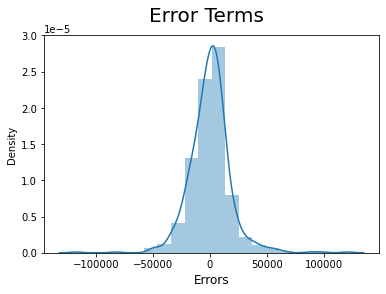

In [891]:
fig = plt.figure() 
residual = y_train - y_train_pred
sns.distplot(residual, bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 12)
plt.show()

### Homoscedasticity
Error terms must have constant variance 

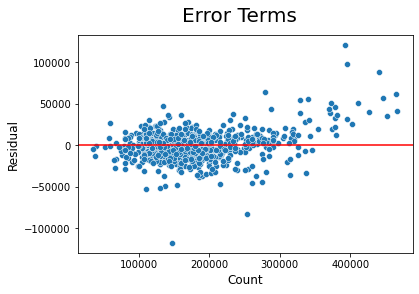

In [892]:
plt.figure() 
residual = y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.axhline(0, color = 'r')
plt.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

# Model Evaluation

### Understand the spread

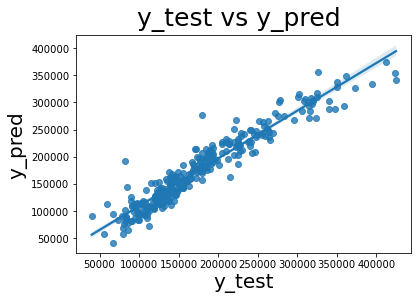

In [893]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)             
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_pred', fontsize = 20)  
plt.show()

In [917]:
cols = x_train_new.columns
lasso.coef_

array([-24683.85476423,      0.        ,  22115.66853379,  85520.59306691,
        16761.29876095,  36097.45817437,   7871.81106332,   3673.6142475 ,
        27244.56197937,     -0.        ,      0.        ,  45596.81060922,
            0.        , 152321.90421386,      0.        ,   2888.20093826,
            0.        ,      0.        ,   7630.14943398,  31031.37864132,
        17358.16977931,   4537.65214574,     -0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,   5133.50487118,     -0.        ,      0.        ,
        -1029.11775727,      0.        ,     -0.        ,   -287.12717771,
         3349.47445771,   -622.81836878,     -0.        ,     -0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
        -1723.25742965,  23661.25906009,  -6733.97161656,      0.        ,
            0.        ,     -0.        ,  -4383.30345782,   -159.16900525,
            0.        ,  

In [916]:
lasso_betas = pd.DataFrame(index=cols)
lasso_betas['Lasso'] = np.round(lasso.coef_,2)
lasso_betas
lasso.coef_

ValueError: Length of values (140) does not match length of index (11)

# Excercise

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [911]:
alpha = 2 * 1.0
ridge_model = Ridge(alpha)
        
ridge_model.fit(x_train_new, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

ridgeMetrics_new = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Value Train: ", r2_train_lr)
ridgeMetrics_new.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Value Test: ", r2_test_lr)
ridgeMetrics_new.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS Value Train: ", rss1_lr)
ridgeMetrics_new.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS Value Test: ", rss2_lr)
ridgeMetrics_new.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE Value Train: ", mse_train_lr)
ridgeMetrics_new.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE Value Train: ", mse_test_lr)
ridgeMetrics_new.append(mse_test_lr**0.5)



ridge_betas['Alpha = 2'] = np.round(ridge_model.coef_,2)
ridge_betas.rename(columns={'Ridge':'Alpha = 1' }, inplace=True)
ridge_betas

R2 Value Train:  0.9274647823126172
R2 Value Test:  0.9111641574228768
RSS Value Train:  254504862890.0624
RSS Value Test:  146871102554.15692
MSE Value Train:  365143275.3085544
MSE Value Train:  491207700.85002315


,Alpha = 1,Alpha = 2
LotArea,51516.26,51516.26
OverallQual,117447.34,117447.34
OverallCond,26769.96,26769.96
YearBuilt,55437.31,55437.31
BsmtFinSF1,38135.22,38135.22
TotalBsmtSF,60911.30,60911.30
GrLivArea,145068.00,145068.00
GarageArea,49840.87,49840.87
Neighborhood_NridgHt,35402.35,35402.35
Neighborhood_StoneBr,27411.51,27411.51


In [898]:
alpha = 2 * 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

lassoMetrics_new = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Value Train: ", r2_train_lr)
lassoMetrics_new.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Value Test: ", r2_test_lr)
lassoMetrics_new.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS Value Train: ", rss1_lr)
lassoMetrics_new.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS Value Test: ", rss2_lr)
lassoMetrics_new.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE Value Train: ", mse_train_lr)
lassoMetrics_new.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE Value Train: ", mse_test_lr)
lassoMetrics_new.append(mse_test_lr**0.5)

R2 Value Train:  0.9274647823126172
R2 Value Test:  0.9111641574228768
RSS Value Train:  254504862890.0624
RSS Value Test:  146871102554.15692
MSE Value Train:  365143275.3085544
MSE Value Train:  491207700.85002315


In [905]:
ridgeMetrics_Excercise = pd.DataFrame({'Metric': ['R2 Value Train','R2 Value Test','RSS Value Train','RSS Value Test', 'MSE Value Train','MSE Value Test'], 'Alpha = 1': np.round(ridgeMetrics,2), 'Alpha = 2' : np.round(ridgeMetrics_new,2)})

In [906]:
ridgeMetrics_Excercise

,Metric,Alpha = 1,Alpha = 2
0,R2 Value Train,8.900000e-01,9.300000e-01
1,R2 Value Test,8.800000e-01,9.200000e-01
2,RSS Value Train,3.962269e+11,2.329056e+11
3,RSS Value Test,1.964527e+11,1.395620e+11
4,MSE Value Train,2.384271e+04,1.827989e+04
5,MSE Value Test,2.563265e+04,2.160469e+04


In [907]:
lassoMetrics_Excersise = pd.DataFrame({'Metric': ['R2 Value Train','R2 Value Test','RSS Value Train','RSS Value Test', 'MSE Value Train','MSE Value Test'], 'Alpha = 100': np.round(lassoMetrics,2), 'Alpha = 200' : np.round(lassoMetrics_new,2)})

In [908]:
lassoMetrics_Excersise

,Metric,Alpha = 1,Alpha = 2
0,R2 Value Train,9.300000e-01,9.300000e-01
1,R2 Value Test,9.200000e-01,9.100000e-01
2,RSS Value Train,2.329056e+11,2.545049e+11
3,RSS Value Test,1.395620e+11,1.468711e+11
4,MSE Value Train,1.827989e+04,1.910872e+04
5,MSE Value Test,2.160469e+04,2.216321e+04


Question 3  

                          Ridge
LotArea                51516.26
OverallQual           117447.34
OverallCond            26769.96
YearBuilt              55437.31
BsmtFinSF1             38135.22
TotalBsmtSF            60911.30
GrLivArea             145068.00
GarageArea             49840.87
Neighborhood_NridgHt   35402.35
Neighborhood_StoneBr   27411.51
Exterior1st_CemntBd    10252.06


,Alpha = 60,Alpha = 120
LotArea,51516.26,51516.26
OverallQual,117447.34,117447.34
OverallCond,26769.96,26769.96
YearBuilt,55437.31,55437.31
BsmtFinSF1,38135.22,38135.22
TotalBsmtSF,60911.30,60911.30
GrLivArea,145068.00,145068.00
GarageArea,49840.87,49840.87
Neighborhood_NridgHt,35402.35,35402.35
Neighborhood_StoneBr,27411.51,27411.51
